In [87]:
import torch
from torch import nn
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

In [88]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(0)

In [89]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [90]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [91]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [92]:
df['Churn'].value_counts(normalize = False)

,count
Churn,
No,5174
Yes,1869


In [93]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

In [94]:
df['PaperlessBilling'].value_counts(normalize = False)

,count
PaperlessBilling,
Yes,4168
No,2864


In [95]:
df['gender'].value_counts(normalize = False) # 0 x

,count
gender,
Male,3549
Female,3483


In [96]:
df['InternetService'].value_counts(normalize=False) # 7

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


In [97]:
df['MultipleLines'].value_counts(normalize=False) # 6

,count
MultipleLines,
No,3385
Yes,2967
No phone service,680


In [98]:
df['Contract'].value_counts(normalize = False)# 14

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [99]:
df['PaymentMethod'].value_counts(normalize = False) # 16

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [100]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [101]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1].values

In [102]:
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting and Encoding the Data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [104]:
# Encoding Categorical and Labeled data
categorical_data = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
label_encoding_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_data),
                                     ('ordinal', OrdinalEncoder(), label_encoding_cols),
                                     ('num', StandardScaler(), numeric_cols)], remainder = "passthrough")

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [105]:
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)

In [106]:
X_train.shape

torch.Size([5625, 28])

# Models


In [107]:
X_train.shape[1]

28

In [171]:
class ChurnModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(28, 128)
    self.relu1 = nn.ReLU()

    self.layer_2 = nn.Linear(128, 128)
    self.relu2 = nn.ReLU()

    self.layer_3 = nn.Linear(128, 128)
    self.relu3 = nn.ReLU()

    self.layer_4 = nn.Linear(128, 1)

  def forward(self, x):
    x = self.relu1(self.layer_1(x))
    x = self.relu2(self.layer_2(x))
    x = self.layer_4(self.layer_3(x))
    return x

In [109]:
class ChurnModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(28, 128)
    self.batchnorm1 = nn.BatchNorm1d(num_features=128)
    self.relu1 = nn.ReLU()
    self.dropout1 = nn.Dropout(p = 0.2)

    self.layer_2 = nn.Linear(128, 128)
    self.batchnorm2 = nn.BatchNorm1d(num_features=128)
    self.relu2 = nn.ReLU()
    self.dropout2 = nn.Dropout(p = 0.4)

    self.layer_2 = nn.Linear(128, 128)
    self.batchnorm2 = nn.BatchNorm1d(num_features=128)
    self.relu2 = nn.ReLU()
    self.dropout2 = nn.Dropout(p = 0.4)

    self.layer_3 = nn.Linear(128, 1)

  def forward(self, x):
    x = self.batchnorm1(self.layer_1(x))
    x = self.relu1(x)
    x = self.dropout1(x)

    x = self.batchnorm2(self.layer_2(x))
    x = self.relu2(x)
    x = self.dropout2(x)

    x = self.layer_3(x)
    return x

In [110]:
class ChurnModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(28, 128)
    self.relu1 = nn.ReLU()

    self.layer_2 = nn.Linear(128, 128)
    self.relu2 = nn.ReLU()

    self.layer_3 = nn.Linear(128, 128)

    self.layer_4 = nn.Linear(128, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu1(self.layer_1(x))
    x = self.relu2(self.layer_2(x))
    x = self.layer_4(self.layer_3(x))
    x = self.sigmoid(x)
    return x

In [111]:
class ChurnModelV4(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(28, 128)
    self.batchnorm1 = nn.BatchNorm1d(num_features=128)
    self.relu1 = nn.ReLU()
    self.dropout1 = nn.Dropout(p = 0.2)

    self.layer_2 = nn.Linear(128, 128)
    self.batchnorm2 = nn.BatchNorm1d(num_features=128)
    self.relu2 = nn.ReLU()
    self.dropout2 = nn.Dropout(p = 0.4)

    self.layer_3 = nn.Linear(128, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.batchnorm1(self.layer_1(x))
    x = self.relu1(x)
    x = self.dropout1(x)

    x = self.batchnorm2(self.layer_2(x))
    x = self.relu2(x)
    x = self.dropout2(x)

    x = self.layer_3(x)
    x = self.sigmoid(x)
    return x

In [112]:
class ChurnModelV5(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(28, 128)
    self.LeakyRelu1 = nn.LeakyReLU()

    self.layer_2 = nn.Linear(128, 128)
    self.LeakyRelu2 = nn.LeakyReLU()

    self.layer_3 = nn.Linear(128, 1)

  def forward(self, x):
    x = self.LeakyRelu1(self.layer_1(x))
    x = self.LeakyRelu2(self.layer_2(x))
    x = self.layer_3(x)
    return x

In [113]:
class ChurnModelV6(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(28, 128)
    self.batchnorm1 = nn.BatchNorm1d(num_features=128)
    self.relu1 = nn.LeakyReLU()
    self.dropout1 = nn.Dropout(p = 0.2)

    self.layer_2 = nn.Linear(128, 128)
    self.batchnorm2 = nn.BatchNorm1d(num_features=128)
    self.relu2 = nn.LeakyReLU()
    self.dropout2 = nn.Dropout(p = 0.4)

    self.layer_3 = nn.Linear(128, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.batchnorm1(self.layer_1(x))
    x = self.relu1(x)
    x = self.dropout1(x)

    x = self.batchnorm2(self.layer_2(x))
    x = self.relu2(x)
    x = self.dropout2(x)

    x = self.layer_3(x)
    x = self.sigmoid(x)
    return x

In [114]:
model_1 = ChurnModel()
model_2 = ChurnModelV2()
model_3 = ChurnModelV3() # Sigmoid
model_4 = ChurnModelV4() # Sigmoid
model_5 = ChurnModelV5()
model_6 = ChurnModelV6() # Sigmoid

# Initial Training set Accuracies


Initial model accuracy : 62.3111 %



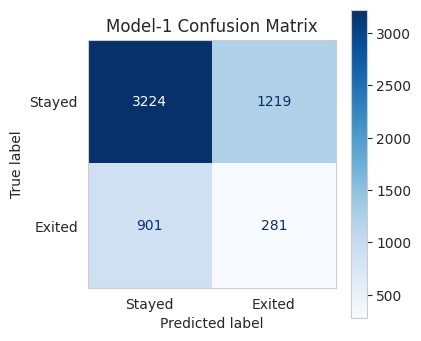

In [115]:
# MODEL 1
with torch.inference_mode():
  y_pred = model_1(X_train)
  y_pred_probs = torch.sigmoid(y_pred)
  y_labels = torch.round(y_pred_probs)

print(f"Initial model accuracy : {accuracy_score(y_labels, y_train) * 100:.4f} %\n")
cm_1 = confusion_matrix(y_labels, y_train)

fig, ax = plt.subplots(figsize=(4, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=["Stayed", "Exited"])
disp.plot(cmap="Blues", ax=ax)
ax.set_title("Model-1 Confusion Matrix")
plt.grid(False)
plt.show()

Initial model accuracy : 52.8533 %



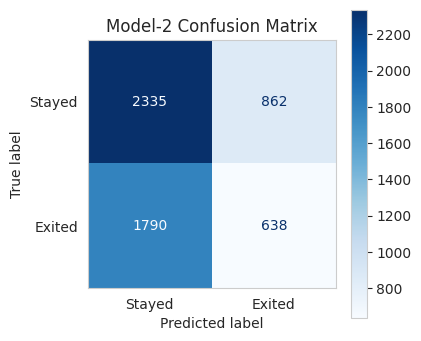

In [116]:
# MODEL 2
with torch.inference_mode():
  y_pred = model_2(X_train)
  y_pred_probs = torch.sigmoid(y_pred)
  y_labels = torch.round(y_pred_probs)

print(f"Initial model accuracy : {accuracy_score(y_labels, y_train) * 100:.4f} %\n")
cm_2 = confusion_matrix(y_labels, y_train)

fig, ax = plt.subplots(figsize=(4, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=["Stayed", "Exited"])
disp.plot(cmap="Blues", ax=ax)
ax.set_title("Model-2 Confusion Matrix")
plt.grid(False)
plt.show()

Initial model accuracy : 26.6667 %



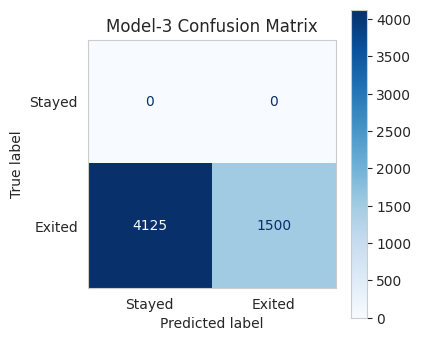

In [170]:
# MODEL 3
with torch.inference_mode():
  y_pred = model_3(X_train)
  y_preds = torch.round(y_pred)

print(f"Initial model accuracy : {accuracy_score(y_preds, y_train) * 100:.4f} %\n")
cm_3 = confusion_matrix(y_preds, y_train)

fig, ax = plt.subplots(figsize=(4, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=["Stayed", "Exited"])
disp.plot(cmap="Blues", ax=ax)
ax.set_title("Model-3 Confusion Matrix")
plt.grid(False)
plt.show()

Initial model accuracy : 51.3600 %



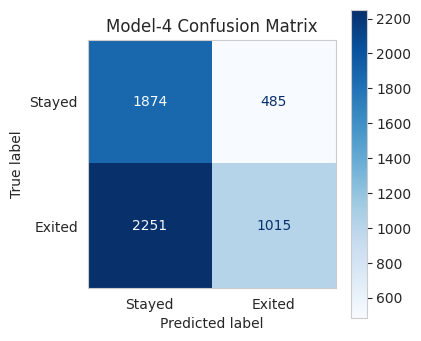

In [118]:
# MODEL 4
with torch.inference_mode():
  y_pred = model_4(X_train)
  y_preds = torch.round(y_pred)

print(f"Initial model accuracy : {accuracy_score(y_preds, y_train) * 100:.4f} %\n")
cm_4 = confusion_matrix(y_preds, y_train)

fig, ax = plt.subplots(figsize=(4, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_4, display_labels=["Stayed", "Exited"])
disp.plot(cmap="Blues", ax=ax)
ax.set_title("Model-4 Confusion Matrix")
plt.grid(False)
plt.show()

Initial model accuracy : 56.1956 %



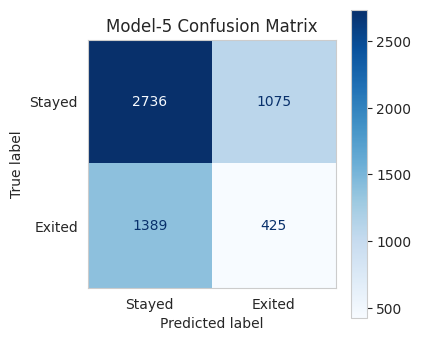

In [119]:
# MODEL 5
with torch.inference_mode():
  y_pred = model_5(X_train)
  y_pred_probs = torch.sigmoid(y_pred)
  y_labels = torch.round(y_pred_probs)

print(f"Initial model accuracy : {accuracy_score(y_labels, y_train) * 100:.4f} %\n")
cm_5 = confusion_matrix(y_labels, y_train)

fig, ax = plt.subplots(figsize=(4, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_5, display_labels=["Stayed", "Exited"])
disp.plot(cmap="Blues", ax=ax)
ax.set_title("Model-5 Confusion Matrix")
plt.grid(False)
plt.show()

Initial model accuracy : 60.9778 %



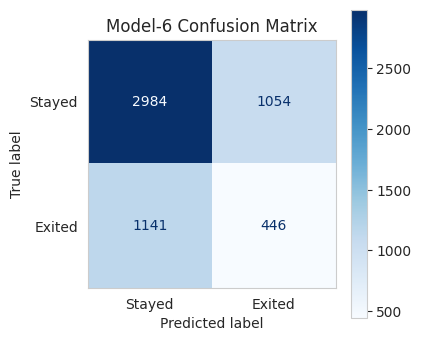

In [120]:
# MODEL 6
with torch.inference_mode():
  y_pred = model_6(X_train)
  y_preds = torch.round(y_pred)

print(f"Initial model accuracy : {accuracy_score(y_preds, y_train) * 100:.4f} %\n")

cm_6 = confusion_matrix(y_preds, y_train)

fig, ax = plt.subplots(figsize=(4, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_6, display_labels=["Stayed", "Exited"])
disp.plot(cmap="Blues", ax=ax)
ax.set_title("Model-6 Confusion Matrix")
plt.grid(False)
plt.show()

# Optimizer and Loss Functions

In [121]:
pos_weight = torch.tensor([5163 / 1869])  # 2.27
# pos_weight=pos_weight

In [122]:
loss_fn_1 = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
loss_fn_2 = nn.BCELoss()

SGD_optim_1 = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)
SGD_optim_2 = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)
SGD_optim_3 = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)
SGD_optim_4 = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)
SGD_optim_5 = torch.optim.SGD(params = model_5.parameters(), lr = 0.1)
SGD_optim_6 = torch.optim.SGD(params = model_6.parameters(), lr = 0.1)

Adam_optim_1 = torch.optim.Adam(params = model_1.parameters(), lr = 0.001)
Adam_optim_2 = torch.optim.Adam(params = model_2.parameters(), lr = 0.001)
Adam_optim_3 = torch.optim.Adam(params = model_3.parameters(), lr = 0.001)
Adam_optim_4 = torch.optim.Adam(params = model_4.parameters(), lr = 0.001)
Adam_optim_5 = torch.optim.Adam(params = model_5.parameters(), lr = 0.001)
Adam_optim_6 = torch.optim.Adam(params = model_6.parameters(), lr = 0.001)

RMSprop_optim_1 = torch.optim.RMSprop(params = model_1.parameters(), lr = 0.001)
RMSprop_optim_2 = torch.optim.RMSprop(params = model_2.parameters(), lr = 0.001)
RMSprop_optim_3 = torch.optim.RMSprop(params = model_3.parameters(), lr = 0.001)
RMSprop_optim_4 = torch.optim.RMSprop(params = model_4.parameters(), lr = 0.001)
RMSprop_optim_5 = torch.optim.RMSprop(params = model_5.parameters(), lr = 0.001)
RMSprop_optim_6 = torch.optim.RMSprop(params = model_6.parameters(), lr = 0.001)

SGDW_optim_1 = torch.optim.SGD(params = model_1.parameters(), lr = 0.01, momentum = 0.9)
SGDW_optim_2 = torch.optim.SGD(params = model_2.parameters(), lr = 0.01, momentum = 0.9)
SGDW_optim_3 = torch.optim.SGD(params = model_3.parameters(), lr = 0.01, momentum = 0.9)
SGDW_optim_4 = torch.optim.SGD(params = model_4.parameters(), lr = 0.01, momentum = 0.9)
SGDW_optim_5 = torch.optim.SGD(params = model_5.parameters(), lr = 0.01, momentum = 0.9)
SGDW_optim_6 = torch.optim.SGD(params = model_6.parameters(), lr = 0.01, momentum = 0.9)

Adagrad_opitm_1 = torch.optim.Adagrad(model_1.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0)
Adagrad_opitm_2 = torch.optim.Adagrad(model_2.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0)
Adagrad_opitm_3 = torch.optim.Adagrad(model_3.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0)
Adagrad_opitm_4 = torch.optim.Adagrad(model_4.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0)
Adagrad_opitm_5 = torch.optim.Adagrad(model_5.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0)
Adagrad_opitm_6 = torch.optim.Adagrad(model_6.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0)

# Training and Testing loops

In [123]:
SGD_precision_scores = []
SGD_f1_scores = []
SGD_recall_scores = []
SGD_accuracy_scores = []

adam_precision_scores = []
adam_f1_scores = []
adam_recall_scores = []
adam_accuracy_scores = []

rms_precision_scores = []
rms_f1_scores = []
rms_recall_scores = []
rms_accuracy_scores = []

SGDW_precision_scores = []
SGDW_f1_scores = []
SGDW_recall_scores = []
SGDW_accuracy_scores = []

adagrad_precision_scores = []
adagrad_f1_scores = []
adagrad_recall_scores = []
adagrad_accuracy_scores = []

In [124]:
def model_loopV1(optimizer, loss_fn, model, precision, recall, f1, accuracy, model_name="", optimizer_name="", epochs=150, limit=100, plot = False, matrix = False, score_board = False, cf = False):
    best_accuracy = 0
    patience_counter = 0
    test_label = 0
    best_accuracy = 0

    epoch_counts = []
    test_loss_values = []
    train_loss_values = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()

        y_logits = model(X_train)
        y_pred_probs = torch.sigmoid(y_logits)
        y_labels = torch.round(y_pred_probs)

        loss = loss_fn(y_logits, y_train)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test)
            test_pred_probs = torch.sigmoid(test_logits)
            test_labels = torch.round(test_pred_probs)

            test_loss = loss_fn(test_logits, y_test)
            test_accuracy = accuracy_score(y_test, test_labels)

            epoch_counts.append(epoch)
            test_loss_values.append(test_loss.item())
            train_loss_values.append(loss.item())
            test_accuracies.append(test_accuracy)

            # Early stopping
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                patience_counter = 0
            else:
                patience_counter += 1
            if score_board == True:

              if epoch % 10 == 0:
                  print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {test_accuracy:.4f}")

            if patience_counter >= limit:
                print(f"\n Early stopping at epoch {epoch} | no improvement in last {limit} epochs.")
                break

    print(f"\n Best accuracy: {best_accuracy * 100:.4f}")

    if plot == True:
      plt.figure(figsize=(10, 5))
      plt.plot(test_accuracies, label="Test Accuracy", color="green")
      plt.title(f"Test Accuracy over Epochs (Best: {best_accuracy * 100:.2f}) %")
      plt.xlabel("Epochs")
      plt.ylabel("Accuracy")
      plt.legend()
      plt.grid(True, alpha = 0.6)
      plt.show()

    if matrix == True:
      cm = confusion_matrix(y_test, test_labels)

      fig, ax = plt.subplots(figsize=(5, 5))

      disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Stayed", "Exited"])
      disp.plot(cmap = "Blues", ax = ax)
      ax.set_title(f"Confusion Matrix of {optimizer_name} with {model_name}")
      plt.grid(False)
      plt.show()

    if cf == True:
      print(classification_report(y_test, test_labels, target_names=["Stayed", "Exited"]))

    p_score = round(precision_score(y_test, test_labels), 2)
    r_score = round(recall_score(y_test, test_labels), 2)
    f_score = round(f1_score(y_test, test_labels), 2)
    best_accuracy = round(best_accuracy * 100, 2)
    p_score = p_score * 100
    r_score = r_score * 100
    f_score = f_score * 100

    precision.append(p_score)
    recall.append(r_score)
    f1.append(f_score)
    accuracy.append(best_accuracy)

    print(f"Precision Score: {p_score:.2f} %")
    print(f"Recall Score:    {r_score:.2f} %")
    print(f"F1 Score:        {f_score:.2f} %")


In [125]:
def model_loopV2(optimizer, loss_fn, model, precision, recall, f1, accuracy, model_name="", optimizer_name="", epochs=150, limit=100, plot = False, matrix = False, score_board = False, cf = False):
    best_accuracy = 0
    patience_counter = 0
    test_label = 0

    epoch_counts = []
    test_loss_values = []
    train_loss_values = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()

        y_preds = model(X_train)
        loss = loss_fn(y_preds, y_train)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        model.eval()
        with torch.inference_mode():
            test_pred_probs = model(X_test)
            test_labels = torch.round(test_pred_probs)

            test_loss = loss_fn(test_pred_probs, y_test)

            test_accuracy = accuracy_score(y_test, test_labels)

            epoch_counts.append(epoch)
            test_loss_values.append(test_loss.item())
            train_loss_values.append(loss.item())
            test_accuracies.append(test_accuracy)

            # Early stopping
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                patience_counter = 0
            else:
                patience_counter += 1

            if score_board == True :
              if epoch % 10 == 0:
                  print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {test_accuracy:.4f}")

            if patience_counter >= limit:
                print(f"\n Early stopping at epoch {epoch} | no improvement in last {limit} epochs.")
                break

    print(f"\n Best accuracy: {best_accuracy * 100:.4f}")

    if plot == True:
      plt.figure(figsize=(10, 5))
      plt.plot(test_accuracies, label="Test Accuracy", color="green")
      plt.title(f"Test Accuracy over Epochs (Best: {best_accuracy * 100:.2f}) %")
      plt.xlabel("Epochs")
      plt.ylabel("Accuracy")
      plt.legend()
      plt.grid(True, alpha = 0.6)
      plt.show()

    if matrix == True:
      cm = confusion_matrix(y_test, test_labels)

      fig, ax = plt.subplots(figsize=(5, 5))

      disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Stayed", "Exited"])
      disp.plot(cmap = "Blues", ax = ax)
      ax.set_title(f"Confusion Matrix of {optimizer_name} with {model_name}")
      plt.grid(False)
      plt.show()

    if cf == True:
      print(classification_report(y_test, test_labels, target_names=["Stayed", "Exited"]))

    p_score = round(precision_score(y_test, test_labels), 2)
    r_score = round(recall_score(y_test, test_labels), 2)
    f_score = round(f1_score(y_test, test_labels), 2)
    best_accuracy = round(best_accuracy * 100, 2)
    p_score = p_score * 100
    r_score = r_score * 100
    f_score = f_score * 100

    precision.append(p_score)
    recall.append(r_score)
    f1.append(f_score)
    accuracy.append(best_accuracy)

    print(f"Precision Score: {p_score:.2f} %")
    print(f"Recall Score:    {r_score:.2f} %")
    print(f"F1 Score:        {f_score:.2f} %")

In [126]:
# @title
sns.set_style("whitegrid")

def accuracy_plot(models, accuracies, optimizer=''):
    best_idx = accuracies.index(max(accuracies))
    bar_colors = ['#B0C4DE' if i != best_idx else '#4682B4' for i in range(len(models))]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, accuracies, color=bar_colors, edgecolor='black', width=0.55)

    # Annotate bars with accuracy values
    for bar, acc in zip(bars, accuracies):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            acc + 0.3,
            f"{acc:.2f}%",
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='semibold',
            color='#333333'
        )

    # Baseline reference line at 80%
    plt.axhline(y=80, color='grey', linestyle='--', linewidth=1, alpha=0.5)

    plt.title(
        f'Performance of {optimizer} Optimizer Across ANN Architectures\n'
        f'(Best: Model-{best_idx + 1} with {accuracies[best_idx]:.2f}%)',
        fontsize=14,
        fontweight='bold',
        pad=15
    )
    plt.xlabel('Model Architectures', fontsize=12)
    plt.ylabel('Test Accuracy (%)', fontsize=12)
    plt.ylim(70, 85)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [127]:
# @title
def plot_metrics_grouped(models, precisions, recalls, f1s):
    n_models = len(models)
    metrics = ['Precision', 'Recall', 'F1']
    n_metrics = len(metrics)

    bar_width = 0.25
    x = np.arange(n_models)

    plt.figure(figsize=(12, 6))

    colors = ['#3B82F6', '#EF4444', '#10B981']

    plt.bar(x - bar_width, precisions, width=bar_width, color=colors[0], label='Precision', edgecolor='black')
    plt.bar(x, recalls, width=bar_width, color=colors[1], label='Recall', edgecolor='black')
    plt.bar(x + bar_width, f1s, width=bar_width, color=colors[2], label='F1 Score', edgecolor='black')

    # Add values on top of bars
    for i in range(n_models):
        plt.text(x[i] - bar_width, precisions[i] + 1, f"{precisions[i]:.1f}%", ha='center', fontsize=9)
        plt.text(x[i], recalls[i] + 1, f"{recalls[i]:.1f}%", ha='center', fontsize=9)
        plt.text(x[i] + bar_width, f1s[i] + 1, f"{f1s[i]:.1f}%", ha='center', fontsize=9)

    plt.xticks(x, models, fontsize=11)
    plt.yticks(fontsize=11)
    plt.ylim(40, 90)  # assuming your scores hover around 50-80%, adjust if needed

    plt.axhline(y=65, color='grey', linestyle='--', linewidth=1, alpha=0.5)

    plt.ylabel('Score (%)', fontsize=12)
    plt.title('Model Performance Metrics Comparison', fontsize=14, fontweight='bold', pad=15)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


### MODEL PERFORMANCES

# Stochastic Gradient Descent

In [128]:
SGD_1 = model_loopV1( SGD_optim_1, loss_fn_1, model_1, SGD_precision_scores, SGD_recall_scores, SGD_f1_scores, SGD_accuracy_scores, 'SGD', 'Model-1')
SGD_1


 Early stopping at epoch 110 | no improvement in last 100 epochs.

 Best accuracy: 78.1805
Precision Score: 50.00 %
Recall Score:    78.00 %
F1 Score:        61.00 %


In [129]:
SGD_2 = model_loopV1(SGD_optim_2, loss_fn_1, model_2, SGD_precision_scores, SGD_recall_scores, SGD_f1_scores, SGD_accuracy_scores, 'SGD', 'Model 2')
SGD_2


 Early stopping at epoch 112 | no improvement in last 100 epochs.

 Best accuracy: 73.7740
Precision Score: 50.00 %
Recall Score:    82.00 %
F1 Score:        62.00 %


In [130]:
SGD_3 = model_loopV2(SGD_optim_3, loss_fn_2, model_3, SGD_precision_scores, SGD_recall_scores, SGD_f1_scores, SGD_accuracy_scores, 'SGD', 'Model 3', limit=100)
SGD_3


 Best accuracy: 80.1706
Precision Score: 65.00 %
Recall Score:    53.00 %
F1 Score:        58.00 %


In [131]:
SGD_4 = model_loopV2(SGD_optim_4, loss_fn_2, model_4, SGD_precision_scores, SGD_recall_scores, SGD_f1_scores, SGD_accuracy_scores, 'SGD', 'Model 4')
SGD_4


 Best accuracy: 80.4549
Precision Score: 63.00 %
Recall Score:    60.00 %
F1 Score:        62.00 %


In [132]:
SGD_5 = model_loopV1(SGD_optim_5, loss_fn_1, model_5, SGD_precision_scores, SGD_recall_scores, SGD_f1_scores, SGD_accuracy_scores, 'SGD', 'Model 5')
SGD_5


 Best accuracy: 75.1244
Precision Score: 52.00 %
Recall Score:    79.00 %
F1 Score:        62.00 %


In [133]:
SGD_6 = model_loopV2(SGD_optim_6, loss_fn_2, model_6, SGD_precision_scores, SGD_recall_scores, SGD_f1_scores, SGD_accuracy_scores,'SGD', 'Model 6')
SGD_6


 Best accuracy: 80.5970
Precision Score: 64.00 %
Recall Score:    60.00 %
F1 Score:        62.00 %


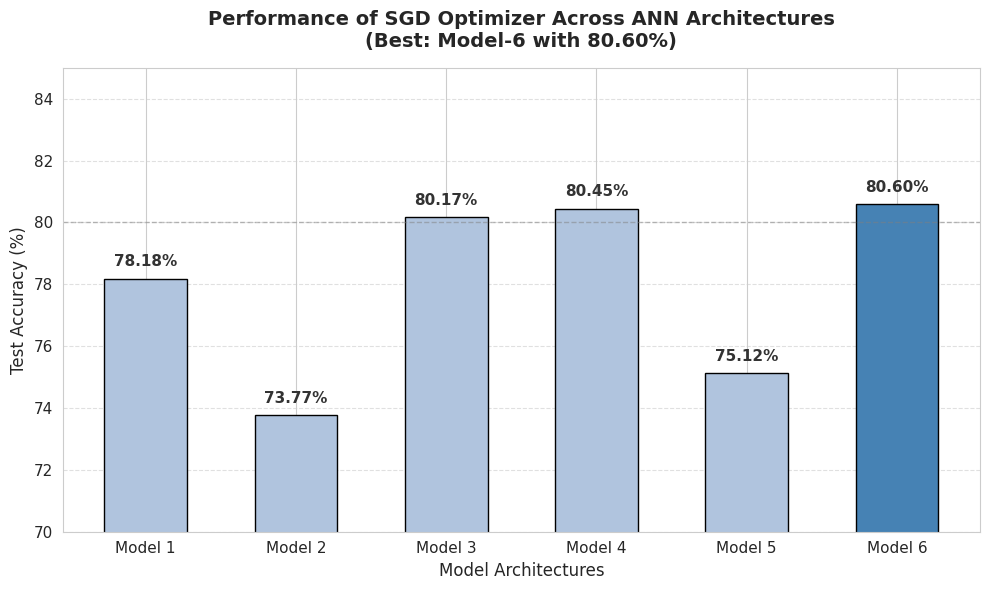

In [134]:
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
accuracy_plot(models, SGD_accuracy_scores, optimizer='SGD')

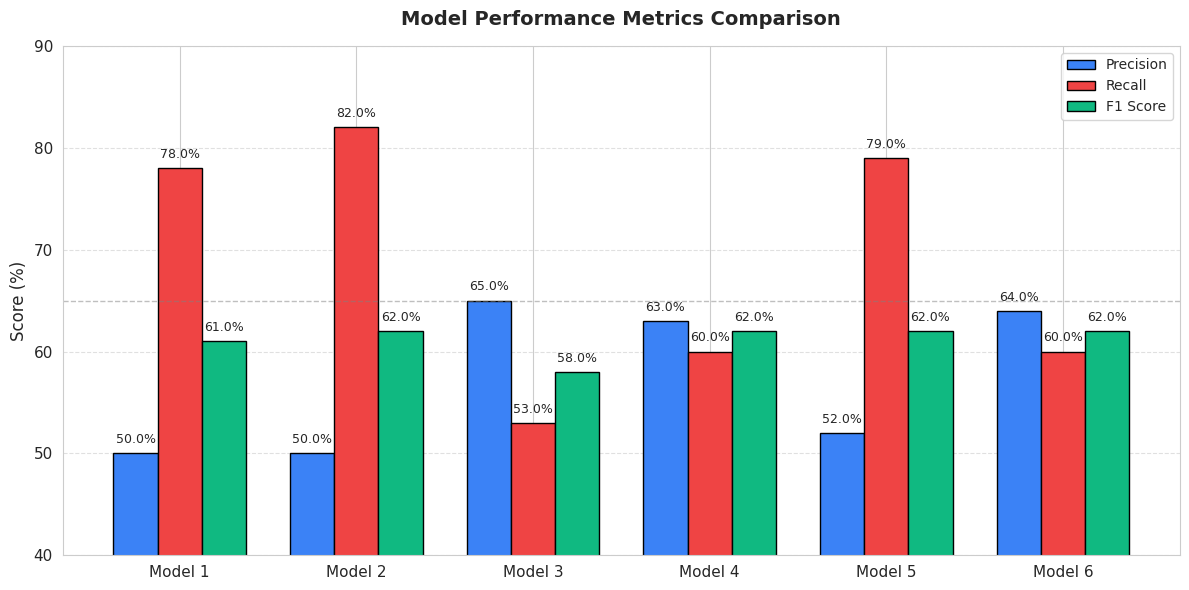

In [135]:
plot_metrics_grouped(models, SGD_precision_scores, SGD_recall_scores, SGD_f1_scores)

# Adaptive moment estimator (Adam)

In [136]:
model_loopV1(Adam_optim_1, loss_fn_1, model_1, adam_precision_scores, adam_recall_scores, adam_f1_scores, adam_accuracy_scores, 'Adam', 'Model 1')


 Best accuracy: 77.1144
Precision Score: 49.00 %
Recall Score:    66.00 %
F1 Score:        56.00 %


In [137]:
model_loopV1(Adam_optim_2, loss_fn_1, model_2, adam_precision_scores, adam_recall_scores, adam_f1_scores, adam_accuracy_scores, 'Adam', 'Model 2')


 Best accuracy: 73.9161
Precision Score: 49.00 %
Recall Score:    76.00 %
F1 Score:        60.00 %


In [138]:
model_loopV2(Adam_optim_3, loss_fn_2, model_3, adam_precision_scores, adam_recall_scores, adam_f1_scores, adam_accuracy_scores, 'Adam', 'Model 3')


 Early stopping at epoch 141 | no improvement in last 100 epochs.

 Best accuracy: 80.5970
Precision Score: 56.00 %
Recall Score:    46.00 %
F1 Score:        51.00 %


In [139]:
model_loopV2(Adam_optim_4, loss_fn_2, model_4, adam_precision_scores, adam_recall_scores, adam_f1_scores, adam_accuracy_scores, 'Adam', 'Model 4')


 Best accuracy: 80.8102
Precision Score: 65.00 %
Recall Score:    56.00 %
F1 Score:        60.00 %


In [140]:
model_loopV1(Adam_optim_5, loss_fn_1, model_5, adam_precision_scores, adam_recall_scores, adam_f1_scores, adam_accuracy_scores, 'Adam', 'Model 5')


 Early stopping at epoch 104 | no improvement in last 100 epochs.

 Best accuracy: 76.6169
Precision Score: 53.00 %
Recall Score:    74.00 %
F1 Score:        62.00 %


In [141]:
model_loopV2(Adam_optim_6, loss_fn_2, model_6, adam_precision_scores, adam_recall_scores, adam_f1_scores, adam_accuracy_scores, 'Adam', 'Model 6')


 Best accuracy: 80.8813
Precision Score: 65.00 %
Recall Score:    57.00 %
F1 Score:        61.00 %


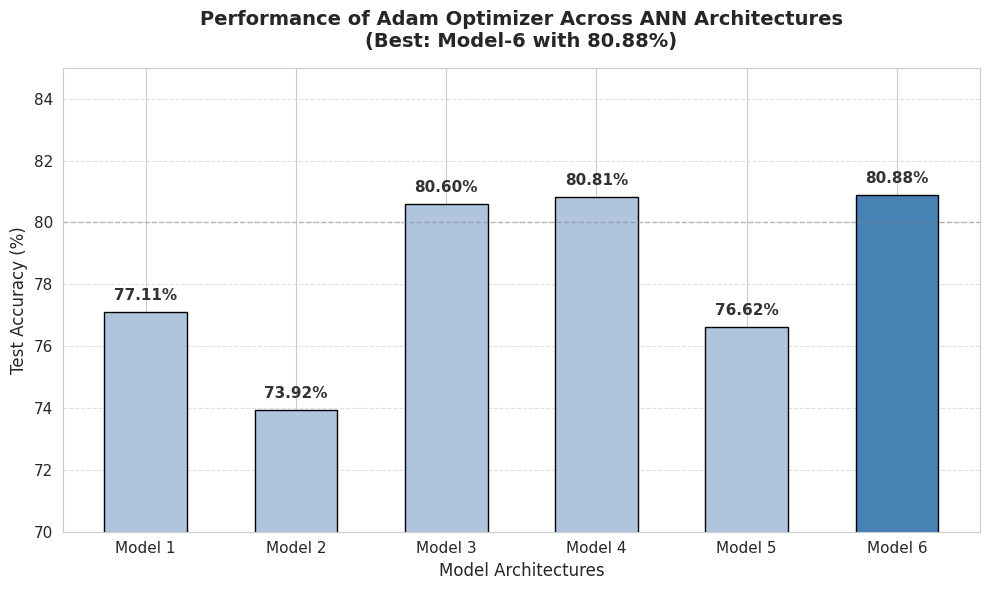

In [142]:
accuracy_plot(models, adam_accuracy_scores, optimizer = 'Adam')

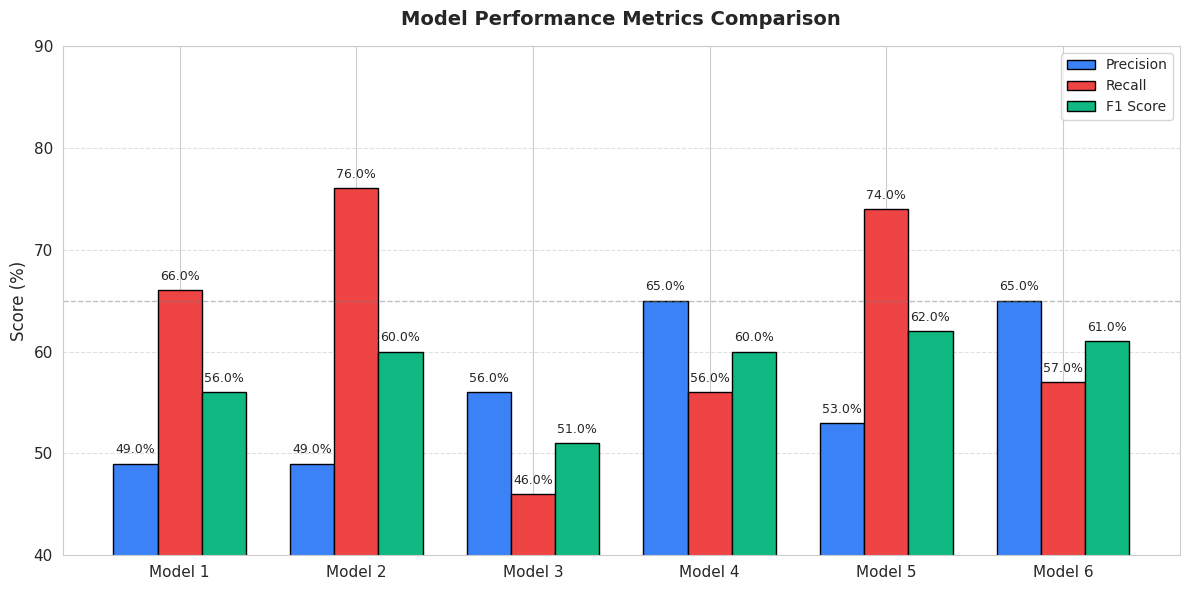

In [143]:
plot_metrics_grouped(models, adam_precision_scores, adam_recall_scores, adam_f1_scores)

# RMSprop

In [144]:
model_loopV1(RMSprop_optim_1, loss_fn_1, model_1, rms_precision_scores, rms_recall_scores, rms_f1_scores, rms_accuracy_scores, 'RMSprop', 'Model 1')


 Early stopping at epoch 103 | no improvement in last 100 epochs.

 Best accuracy: 79.3177
Precision Score: 45.00 %
Recall Score:    79.00 %
F1 Score:        57.00 %


In [145]:
model_loopV1(RMSprop_optim_2, loss_fn_1, model_2, rms_precision_scores, rms_recall_scores, rms_f1_scores, rms_accuracy_scores, 'RMSprop', 'Model 2')


 Early stopping at epoch 103 | no improvement in last 100 epochs.

 Best accuracy: 78.0384
Precision Score: 50.00 %
Recall Score:    73.00 %
F1 Score:        59.00 %


In [146]:
model_loopV2(RMSprop_optim_3, loss_fn_2, model_3, rms_precision_scores, rms_recall_scores, rms_f1_scores, rms_accuracy_scores, 'RMSprop', 'Model 3')


 Early stopping at epoch 100 | no improvement in last 100 epochs.

 Best accuracy: 26.2260
Precision Score: 26.00 %
Recall Score:    100.00 %
F1 Score:        42.00 %


In [147]:
model_loopV2(RMSprop_optim_4, loss_fn_2, model_4, rms_precision_scores, rms_recall_scores, rms_f1_scores, rms_accuracy_scores, 'RMSprop', 'Model 4')


 Early stopping at epoch 113 | no improvement in last 100 epochs.

 Best accuracy: 80.5259
Precision Score: 60.00 %
Recall Score:    56.00 %
F1 Score:        58.00 %


In [148]:
model_loopV1(RMSprop_optim_5, loss_fn_1, model_5, rms_precision_scores, rms_recall_scores, rms_f1_scores, rms_accuracy_scores,'RMSprop', 'Model 5')


 Early stopping at epoch 140 | no improvement in last 100 epochs.

 Best accuracy: 80.0284
Precision Score: 57.00 %
Recall Score:    63.00 %
F1 Score:        60.00 %


In [149]:
model_loopV2(RMSprop_optim_6, loss_fn_2, model_6, rms_precision_scores, rms_recall_scores, rms_f1_scores, rms_accuracy_scores, 'RMSprop', 'Model 6')


 Early stopping at epoch 100 | no improvement in last 100 epochs.

 Best accuracy: 80.8102
Precision Score: 60.00 %
Recall Score:    55.00 %
F1 Score:        58.00 %


<ipython-input-126-3063354386>:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


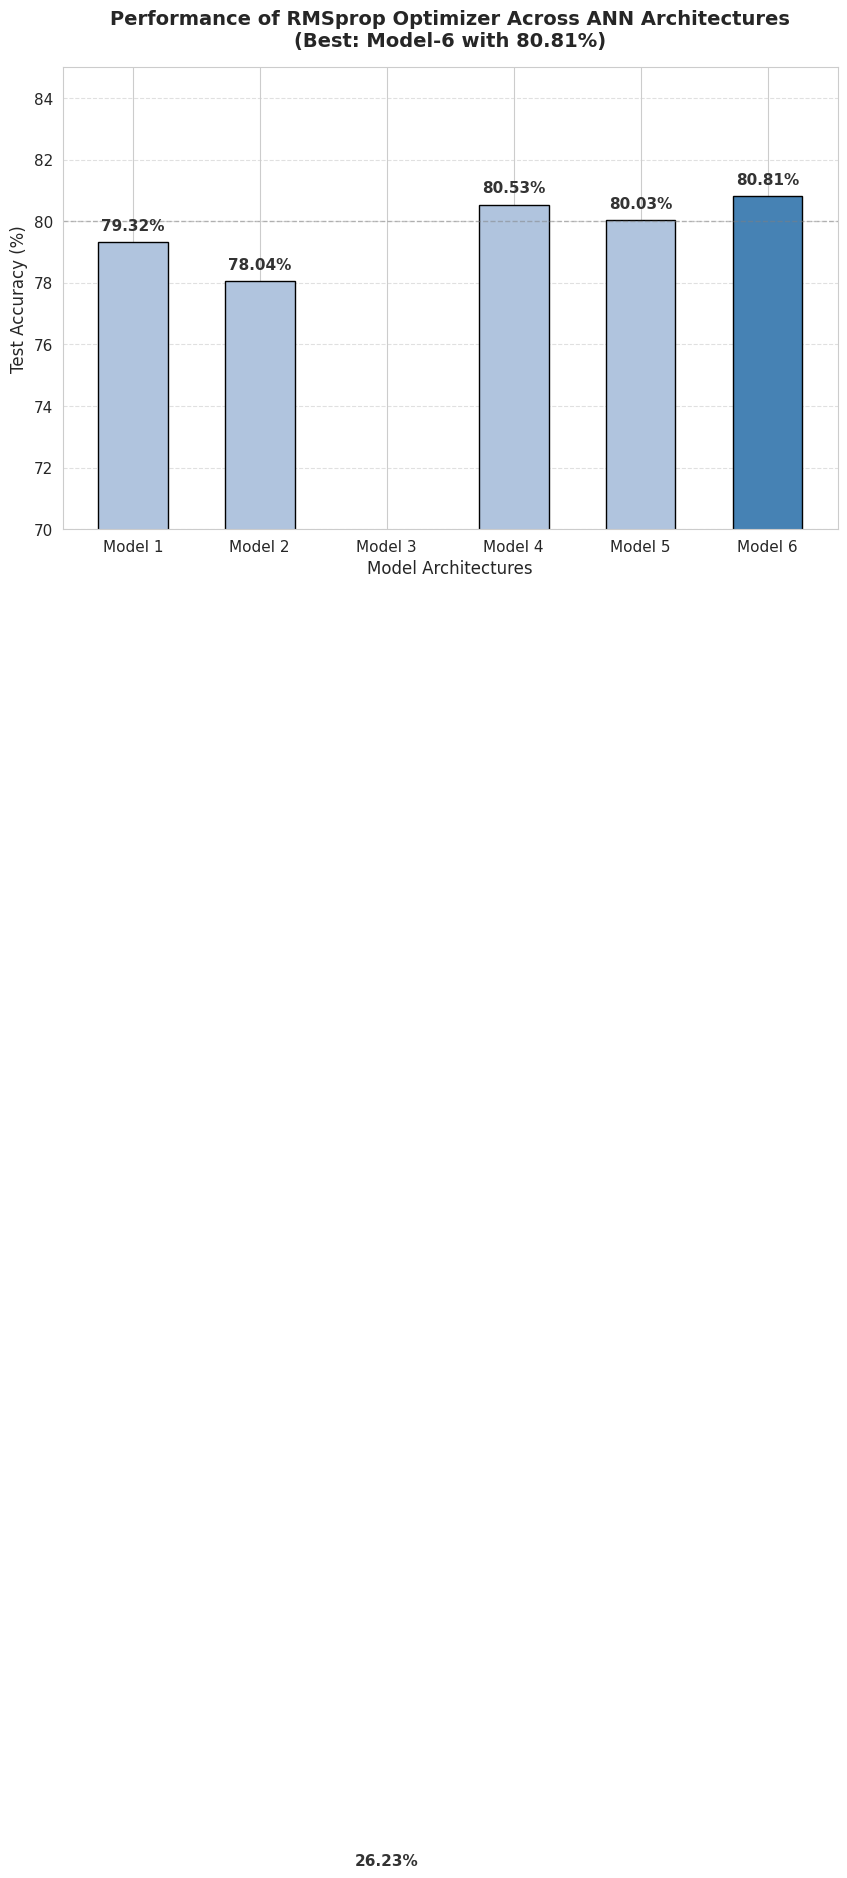

In [150]:
accuracy_plot(models, rms_accuracy_scores, optimizer = 'RMSprop')

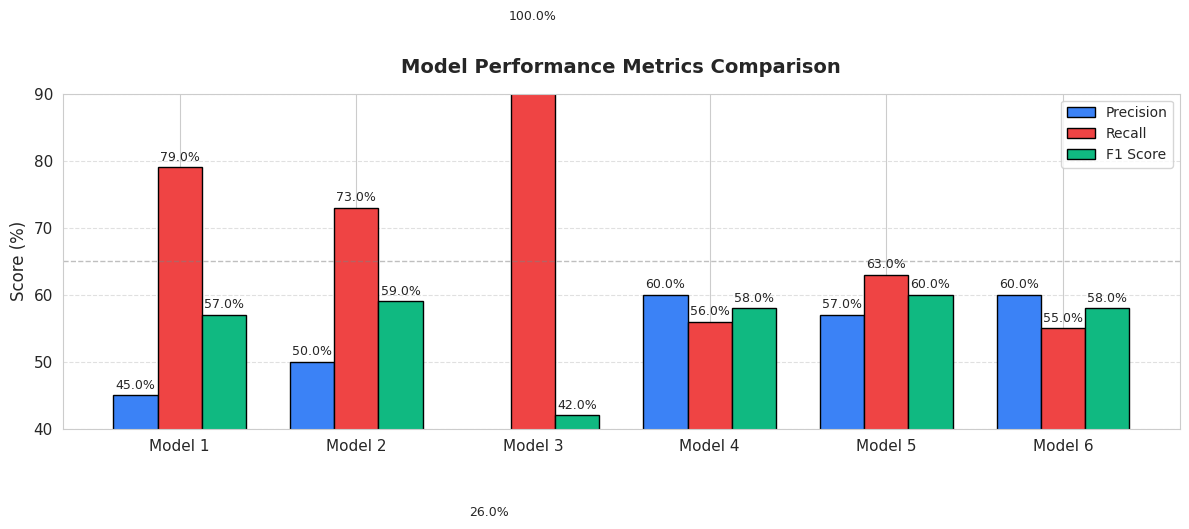

In [151]:
plot_metrics_grouped(models, rms_precision_scores, rms_recall_scores, rms_f1_scores)

# SGD with Momentum


In [152]:
model_loopV1(SGDW_optim_1, loss_fn_1, model_1, SGDW_precision_scores, SGDW_recall_scores, SGDW_f1_scores, SGDW_accuracy_scores, 'SGDW', 'Model 1')


 Early stopping at epoch 101 | no improvement in last 100 epochs.

 Best accuracy: 77.8962
Precision Score: 51.00 %
Recall Score:    62.00 %
F1 Score:        56.00 %


In [153]:
model_loopV1(SGDW_optim_2, loss_fn_1, model_2, SGDW_precision_scores, SGDW_recall_scores, SGDW_f1_scores, SGDW_accuracy_scores, 'SGDW', 'Model 2')


 Best accuracy: 73.9161
Precision Score: 50.00 %
Recall Score:    73.00 %
F1 Score:        59.00 %


In [154]:
SGD_optim_3 = torch.optim.SGD(params=model_3.parameters(), lr=0.01, momentum=0.9)
loss_fn_2 = nn.BCELoss()
model_loopV2(SGD_optim_3, loss_fn_2, model_3, SGDW_precision_scores, SGDW_recall_scores, SGDW_f1_scores, SGDW_accuracy_scores, 'SGDW', 'Model 3')


 Early stopping at epoch 100 | no improvement in last 100 epochs.

 Best accuracy: 26.2260
Precision Score: 26.00 %
Recall Score:    100.00 %
F1 Score:        42.00 %


In [155]:
model_loopV2(SGDW_optim_4, loss_fn_2, model_4, SGDW_precision_scores, SGDW_recall_scores, SGDW_f1_scores, SGDW_accuracy_scores, 'SGDW', 'Model 4')


 Early stopping at epoch 113 | no improvement in last 100 epochs.

 Best accuracy: 79.6731
Precision Score: 61.00 %
Recall Score:    55.00 %
F1 Score:        58.00 %


In [156]:
model_loopV1(SGDW_optim_5, loss_fn_1, model_5, SGDW_precision_scores, SGDW_recall_scores, SGDW_f1_scores, SGDW_accuracy_scores, 'SGDW', 'Model 5')


 Early stopping at epoch 111 | no improvement in last 100 epochs.

 Best accuracy: 77.6830
Precision Score: 51.00 %
Recall Score:    70.00 %
F1 Score:        59.00 %


In [157]:
model_loopV2(SGDW_optim_6, loss_fn_2, model_6, SGDW_precision_scores, SGDW_recall_scores, SGDW_f1_scores, SGDW_accuracy_scores, 'SGDW', 'Model 6')


 Early stopping at epoch 100 | no improvement in last 100 epochs.

 Best accuracy: 78.6780
Precision Score: 60.00 %
Recall Score:    55.00 %
F1 Score:        58.00 %


<ipython-input-126-3063354386>:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


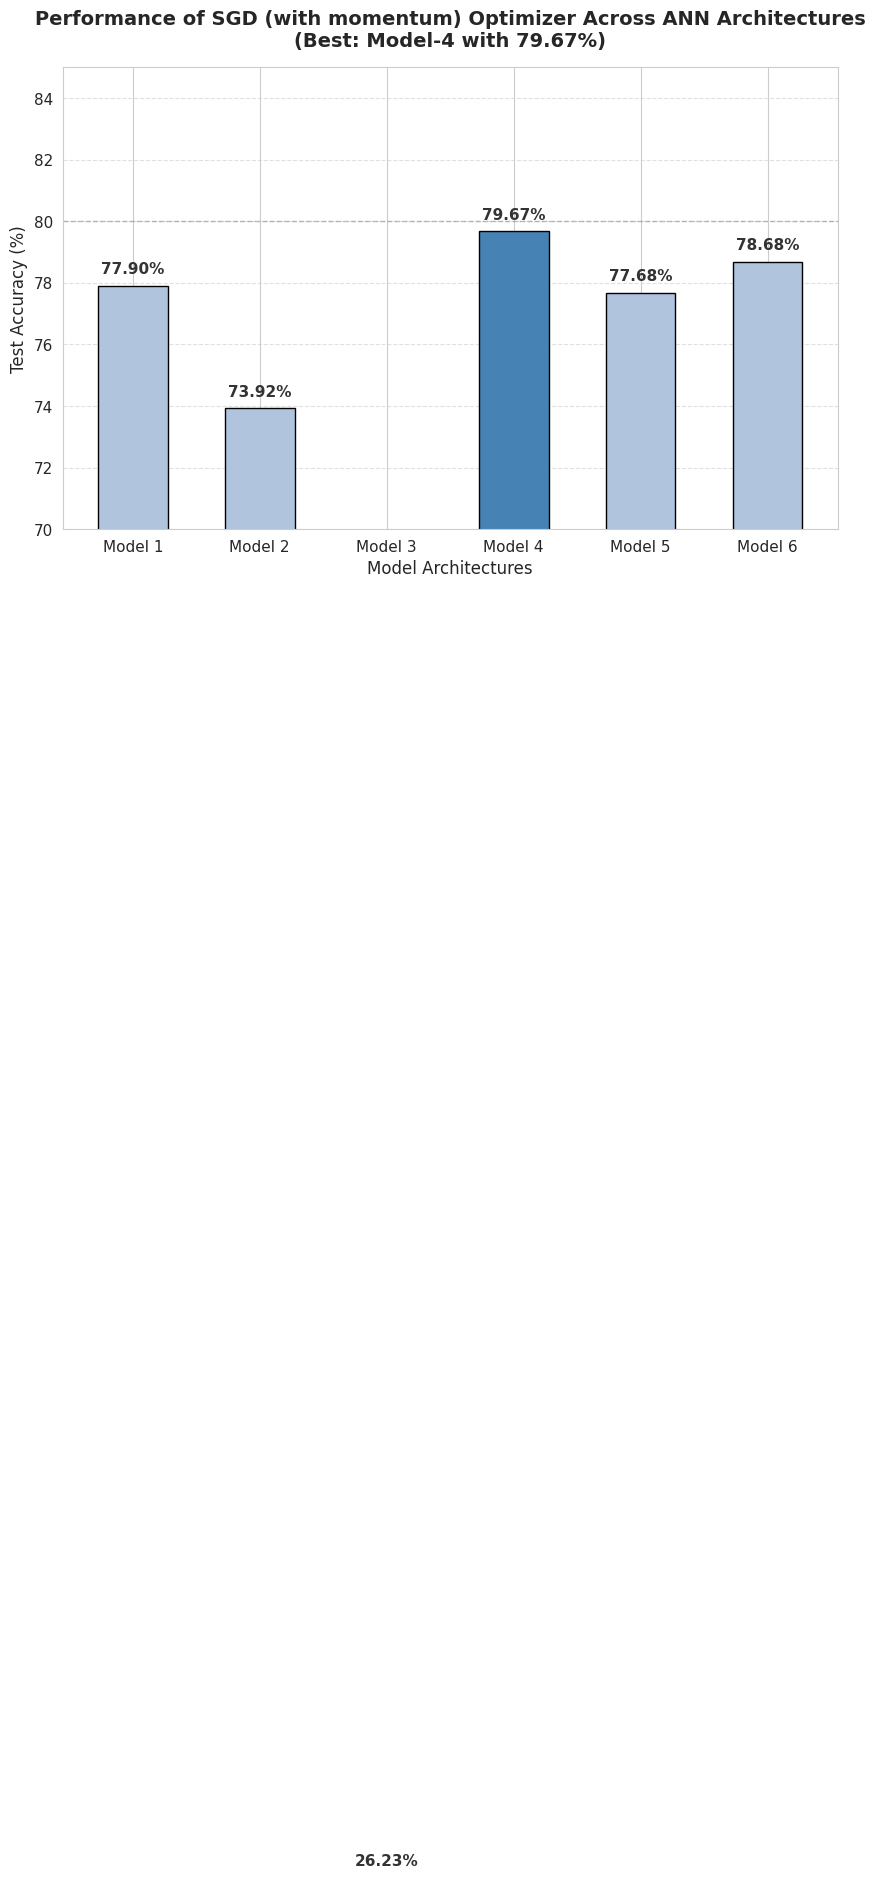

Model 1 and Model 5 performed similarly


In [158]:
accuracy_plot(models, SGDW_accuracy_scores, optimizer = 'SGD (with momentum)')
print("Model 1 and Model 5 performed similarly")

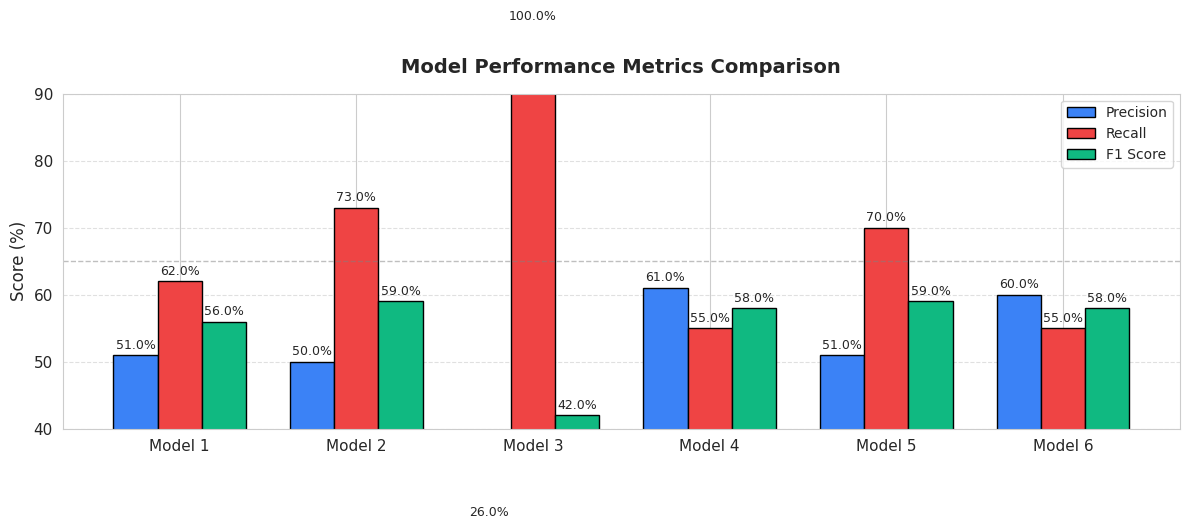

In [159]:
plot_metrics_grouped(models, SGDW_precision_scores, SGDW_recall_scores, SGDW_f1_scores)

# AdaGrad

In [160]:
model_loopV1(Adagrad_opitm_1, loss_fn_1, model_1, adagrad_precision_scores, adagrad_recall_scores, adagrad_f1_scores, adagrad_accuracy_scores, 'AdaGrad', 'Model 1')


 Early stopping at epoch 112 | no improvement in last 100 epochs.

 Best accuracy: 79.4598
Precision Score: 57.00 %
Recall Score:    56.00 %
F1 Score:        57.00 %


In [161]:
model_loopV1(Adagrad_opitm_2, loss_fn_1, model_2, adagrad_precision_scores, adagrad_recall_scores, adagrad_f1_scores, adagrad_accuracy_scores, 'AdaGrad', 'Model 2')


 Early stopping at epoch 103 | no improvement in last 100 epochs.

 Best accuracy: 75.8351
Precision Score: 50.00 %
Recall Score:    71.00 %
F1 Score:        58.00 %


In [162]:
model_loopV2(Adagrad_opitm_3, loss_fn_2, model_3, adagrad_precision_scores, adagrad_recall_scores, adagrad_f1_scores, adagrad_accuracy_scores, 'AdaGrad', 'Model 3')


 Early stopping at epoch 100 | no improvement in last 100 epochs.

 Best accuracy: 26.2260
Precision Score: 26.00 %
Recall Score:    100.00 %
F1 Score:        42.00 %


In [163]:
model_loopV2(Adagrad_opitm_4, loss_fn_2, model_4, adagrad_precision_scores, adagrad_recall_scores, adagrad_f1_scores, adagrad_accuracy_scores, 'AdaGrad', 'Model 4')


 Early stopping at epoch 122 | no improvement in last 100 epochs.

 Best accuracy: 79.8152
Precision Score: 60.00 %
Recall Score:    55.00 %
F1 Score:        57.00 %


In [164]:
model_loopV1(Adagrad_opitm_5, loss_fn_1, model_5, adagrad_precision_scores, adagrad_recall_scores, adagrad_f1_scores, adagrad_accuracy_scores, 'AdaGrad', 'Model 5')


 Early stopping at epoch 137 | no improvement in last 100 epochs.

 Best accuracy: 79.2466
Precision Score: 58.00 %
Recall Score:    61.00 %
F1 Score:        60.00 %


In [165]:
model_loopV2(Adagrad_opitm_6, loss_fn_2, model_6, adagrad_precision_scores, adagrad_recall_scores, adagrad_f1_scores, adagrad_accuracy_scores, 'AdaGrad', 'Model 6')


 Early stopping at epoch 104 | no improvement in last 100 epochs.

 Best accuracy: 80.3127
Precision Score: 59.00 %
Recall Score:    54.00 %
F1 Score:        57.00 %


<ipython-input-126-3063354386>:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


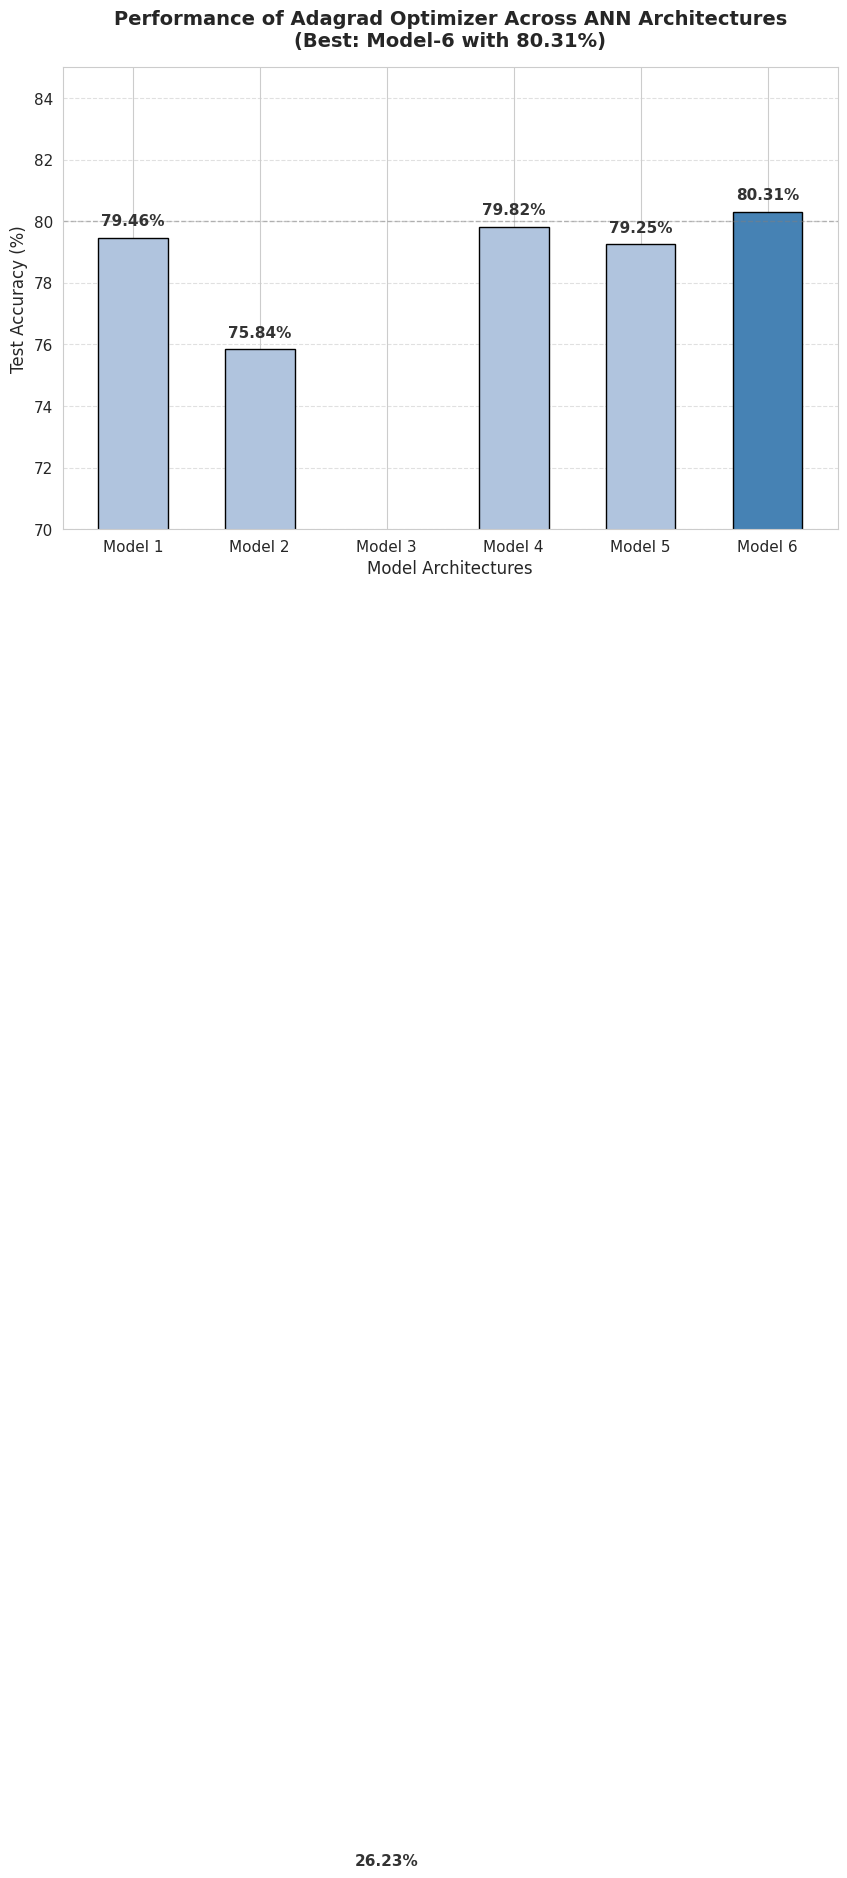

In [166]:
accuracy_plot(models, adagrad_accuracy_scores, optimizer = 'Adagrad')

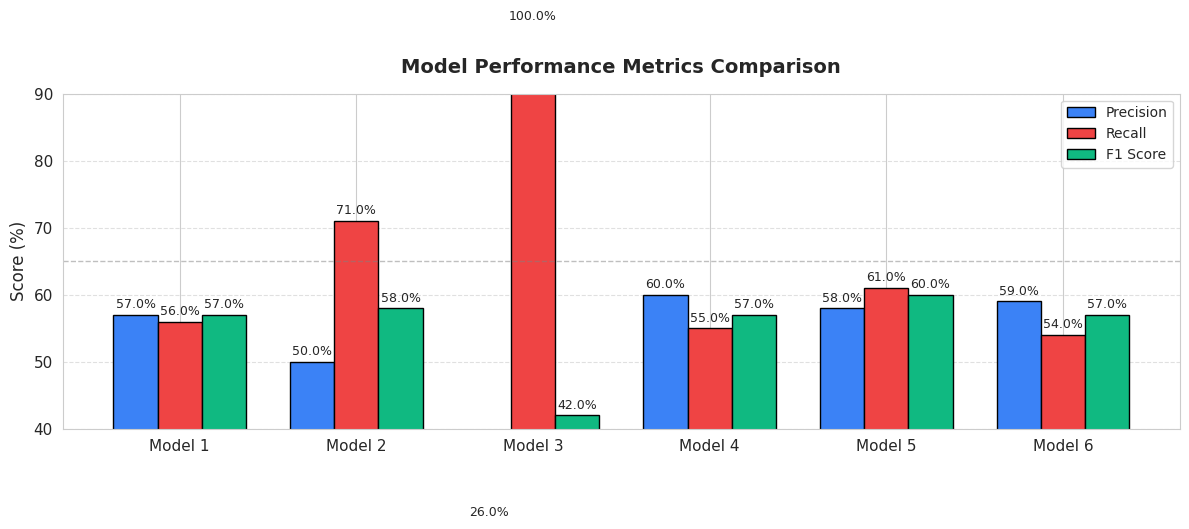

In [167]:
plot_metrics_grouped(models, adagrad_precision_scores, adagrad_recall_scores, adagrad_f1_scores)

# Summary Table

In [168]:

summary = {
    "Model": [f"Model {i+1}" for i in range(6)] * 5,
    "Optimizer": (["SGD"] * 6 +
                  ["Adam"] * 6 +
                  ["RMSProp"] * 6 +
                  ["SGD+W"] * 6 +
                  ["Adagrad"] * 6),
    "Accuracy": SGD_accuracy_scores + adam_accuracy_scores + rms_accuracy_scores + SGDW_accuracy_scores + adagrad_accuracy_scores,
    "Precision": SGD_precision_scores + adam_precision_scores + rms_precision_scores + SGDW_precision_scores + adagrad_precision_scores,
    "Recall": SGD_recall_scores + adam_recall_scores + rms_recall_scores + SGDW_recall_scores + adagrad_recall_scores,
    "F1 Score": SGD_f1_scores + adam_f1_scores + rms_f1_scores + SGDW_f1_scores + adagrad_f1_scores
}

df = pd.DataFrame(summary)
df = df.round(2)
df

,Model,Optimizer,Accuracy,Precision,Recall,F1 Score
0,Model 1,SGD,78.18,50.0,78.0,61.0
1,Model 2,SGD,73.77,50.0,82.0,62.0
2,Model 3,SGD,80.17,65.0,53.0,58.0
3,Model 4,SGD,80.45,63.0,60.0,62.0
4,Model 5,SGD,75.12,52.0,79.0,62.0
5,Model 6,SGD,80.60,64.0,60.0,62.0
6,Model 1,Adam,77.11,49.0,66.0,56.0
7,Model 2,Adam,73.92,49.0,76.0,60.0
8,Model 3,Adam,80.60,56.0,46.0,51.0
9,Model 4,Adam,80.81,65.0,56.0,60.0


In [169]:
df["Composite Score"] = (0.3 * df["Accuracy"] +
                         0.3 * df["F1 Score"] +
                         0.2 * df["Precision"] +
                         0.2 * df["Recall"])

df = df.sort_values(by="Composite Score", ascending=False)
df.head()

,Model,Optimizer,Accuracy,Precision,Recall,F1 Score,Composite Score
5,Model 6,SGD,80.60,64.0,60.0,62.0,67.580
0,Model 1,SGD,78.18,50.0,78.0,61.0,67.354
4,Model 5,SGD,75.12,52.0,79.0,62.0,67.336
3,Model 4,SGD,80.45,63.0,60.0,62.0,67.335
1,Model 2,SGD,73.77,50.0,82.0,62.0,67.131
